In [1]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
X[:1]

array([[5.1, 3.5, 1.4, 0.2]])

In [3]:
y[:5]

array([0, 0, 0, 0, 0])

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)  # We will reduce to 2 dimensions for visualization purposes
X_lda = lda.fit_transform(X_scaled, y)

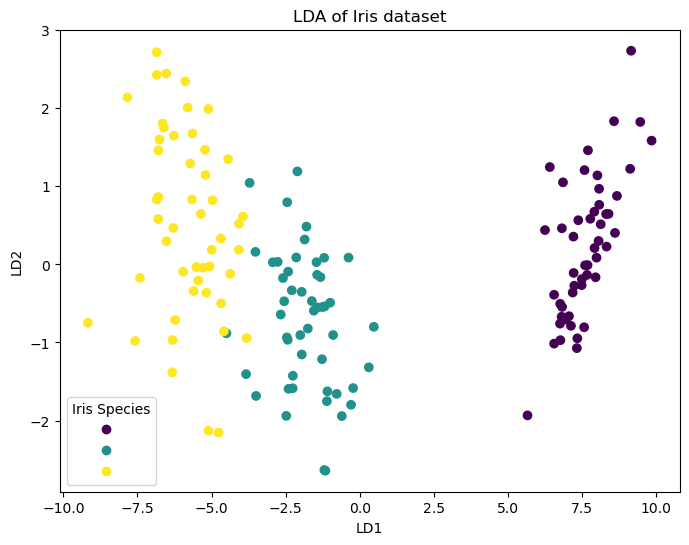

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, label=iris.target_names)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(handles=scatter.legend_elements()[0], title='Iris Species')
plt.title('LDA of Iris dataset')
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [8]:
import numpy as np
new_flower = np.array([5.1, 3.5, 1.4, 0.2])

In [9]:
# Assuming 'new_flower' contains feature values for the new flower in the same format as the Iris dataset
new_flower_scaled = scaler.transform(new_flower.reshape(1, -1))
new_flower_lda = lda.transform(new_flower_scaled)
predicted_species = clf.predict(new_flower_lda)
print("Predicted Species:", iris.target_names[predicted_species][0])

Predicted Species: setosa


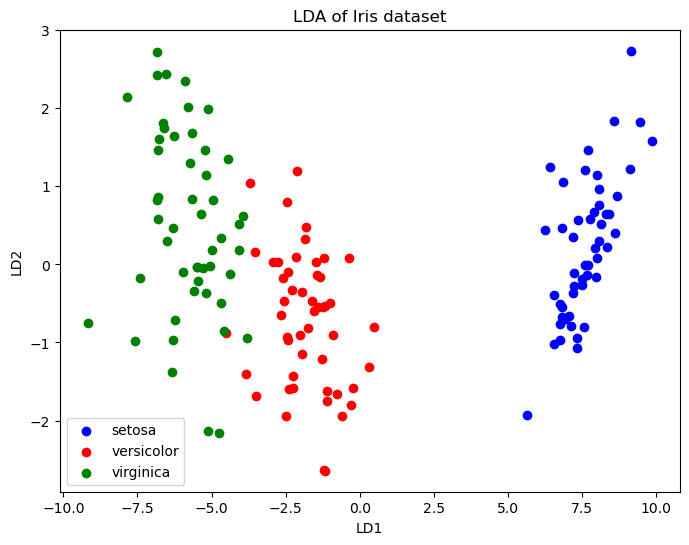

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for label, color in zip(range(3), ('blue', 'red', 'green')):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=iris.target_names[label], color=color)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='best')
plt.title('LDA of Iris dataset')
plt.show()
